### Fixed Attitude Analysis

# Overview

Analysis of using fine pointing mode of the ADCS 10m for imaging passes

# Next Steps

- Update MOI matrix and surface area

In [2]:
import sys
sys.path.insert(0, '../')

In [4]:
from attitude_planning.tools.simulator import TensorTechSimulation, SimulatonConfig, Maneuver, AlignmentAxis

MANEUVER = Maneuver.FINE_POINTING
ALIGN = AlignmentAxis.POS_Z
SIMULATION_TIME = 30
QUAT = ["0.966", "0.259", "0.0", "0.0"] # +30 deg on X axis

config = SimulatonConfig("idr", MANEUVER, SIMULATION_TIME, ALIGN)
config.fine_cmd = QUAT
config.step_size = 0.01
sim = TensorTechSimulation(config)
sim.run()
sim.save("fixed_attitude_idr_july_2024.json")


Progress: 100% [==========]Request failed with status code 500
<html>
  <head>
    <title>Internal Server Error</title>
  </head>
  <body>
    <h1><p>Internal Server Error</p></h1>
    
  </body>
</html>



NameError: name 'exit' is not defined

In [5]:
print(sim.session)

177735af-016a-4839-b90d-bd6a9cd8d619


In [4]:
from attitude_planning.classes.simulation import Simulation

simulation = Simulation.from_tensor_tech_sim(sim)
simulation.derive_data()

In [5]:
# Plot results

from attitude_planning.visualization.scanlines import animate_sim_lla

animate_sim_lla(simulation)

[(datetime.datetime(2022, 5, 26, 21, 11, 10), 77.32314630928087), (datetime.datetime(2022, 5, 26, 21, 11, 11), 70.7673318366179), (datetime.datetime(2022, 5, 26, 21, 11, 12), 62.982127603870204), (datetime.datetime(2022, 5, 26, 21, 11, 13), 54.09128798470896), (datetime.datetime(2022, 5, 26, 21, 11, 14), 44.20301514232543), (datetime.datetime(2022, 5, 26, 21, 11, 15), 33.44355799424143), (datetime.datetime(2022, 5, 26, 21, 11, 16), 22.006388448632215), (datetime.datetime(2022, 5, 26, 21, 11, 17), 10.205310812268788), (datetime.datetime(2022, 5, 26, 21, 11, 18), -1.503466174614156), (datetime.datetime(2022, 5, 26, 21, 11, 29), 35.90341752171055), (datetime.datetime(2022, 5, 26, 21, 11, 30), 38.68063669558531), (datetime.datetime(2022, 5, 26, 21, 11, 31), 38.8548634574025), (datetime.datetime(2022, 5, 26, 21, 11, 32), 37.56477313725078), (datetime.datetime(2022, 5, 26, 21, 11, 33), 35.398156525242996), (datetime.datetime(2022, 5, 26, 21, 11, 34), 32.68327965941069), (datetime.datetime(20

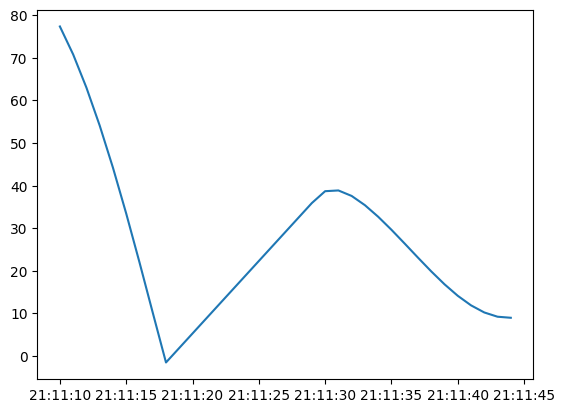

In [6]:
from attitude_planning.visualization.quantity import plot_quantity, Quantity

plot_quantity(simulation, Quantity.SCANLINE_ROTATION)

[(datetime.datetime(2022, 5, 26, 21, 11, 11), 131475.1218923555), (datetime.datetime(2022, 5, 26, 21, 11, 12), 116911.43702372814), (datetime.datetime(2022, 5, 26, 21, 11, 13), 103236.50679098172), (datetime.datetime(2022, 5, 26, 21, 11, 14), 93709.34505216456), (datetime.datetime(2022, 5, 26, 21, 11, 15), 90619.02619264158), (datetime.datetime(2022, 5, 26, 21, 11, 16), 97460.94801933996), (datetime.datetime(2022, 5, 26, 21, 11, 17), 120884.2547971929), (datetime.datetime(2022, 5, 26, 21, 11, 18), 174911.841721897), (datetime.datetime(2022, 5, 26, 21, 11, 30), 208018.9206995113), (datetime.datetime(2022, 5, 26, 21, 11, 31), 154148.50667152854), (datetime.datetime(2022, 5, 26, 21, 11, 32), 123330.55498888463), (datetime.datetime(2022, 5, 26, 21, 11, 33), 104472.90089561846), (datetime.datetime(2022, 5, 26, 21, 11, 34), 92614.81235758307), (datetime.datetime(2022, 5, 26, 21, 11, 35), 85212.79822883161), (datetime.datetime(2022, 5, 26, 21, 11, 36), 80848.31295460186), (datetime.datetime(2

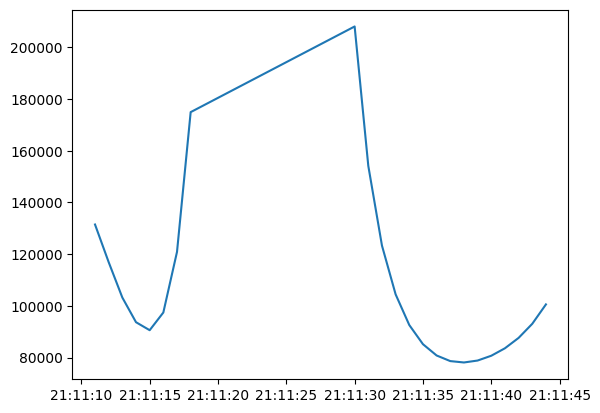

In [7]:
plot_quantity(simulation, Quantity.SCANLINE_INTERVAL)